<a href="https://colab.research.google.com/github/AndresMontesDeOca/Redes_Neuronales/blob/main/02_Drogas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Montar la carpeta de Google Drive y definir constantes para trabajar

In [ ]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook: # maquina virtual colab
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else: # maquina local ipython
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes' # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/'  # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Mounted at /content/drive/


###Ejercicio a resolver
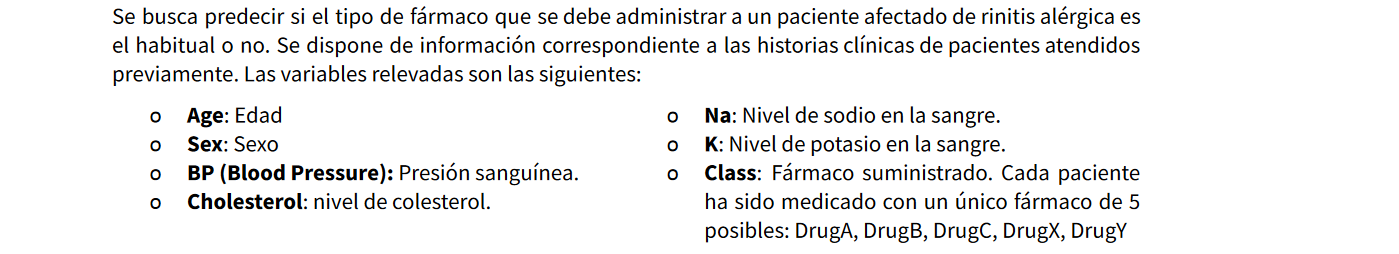

###Importación de paquetes a utilzar

In [ ]:
import pandas as pd
import numpy as np

from sklearn import model_selection, preprocessing, metrics
from ClassPerceptron import Perceptron  # importa clase preceptron de Laura

from matplotlib import pylab as plt

###Carga de datos y numerización

In [ ]:
# Leer los datos de entrenamiento y de testeo
df_train = pd.read_csv(DATOS_DIR+'Drug_train.csv')
print('Cant.de ejemplos de entrenamiento: ', len(df_train))

df_test = pd.read_csv(DATOS_DIR+'Drug_test.csv')
print('Cant.de ejemplos de testeo: ', len(df_test))

print(df_train.head())

Cant.de ejemplos de entrenamiento:  160
Cant.de ejemplos de testeo:  40
   Age Sex    BP Cholesterol        Na         K   Drug
0   16   M   LOW        HIGH  0.743021  0.061886  drugC
1   42   F  HIGH        HIGH  0.533228  0.025348  drugY
2   33   F   LOW        HIGH  0.858387  0.025634  drugY
3   47   M   LOW        HIGH  0.697269  0.068944  drugC
4   56   F  HIGH        HIGH  0.750962  0.029571  drugY


In [ ]:
#-- ordinales a numericos ---
mapeo = {'Sex': {'F':1, 'M':0},
          'BP':{'HIGH':2, 'NORMAL':1, 'LOW':0},
          'Cholesterol':{'NORMAL':0, 'HIGH':1}}

df_train.replace(mapeo, inplace=True)
print(df_train.head())

   Age  Sex  BP  Cholesterol        Na         K   Drug
0   16    0   0            1  0.743021  0.061886  drugC
1   42    1   2            1  0.533228  0.025348  drugY
2   33    1   0            1  0.858387  0.025634  drugY
3   47    0   0            1  0.697269  0.068944  drugC
4   56    1   2            1  0.750962  0.029571  drugY


In [ ]:
df_test.replace(mapeo, inplace=True)
print(df_test.head())

   Age  Sex  BP  Cholesterol        Na         K   Drug
0   47    1   0            1  0.539774  0.053620  drugC
1   49    0   0            0  0.625889  0.056828  drugX
2   50    0   2            1  0.518285  0.069193  drugA
3   32    1   1            1  0.549375  0.073474  drugX
4   40    0   2            1  0.557133  0.020022  drugY


###Preparación de Datos de Entrenamiento y Prueba

In [ ]:
#--- DATOS DE ENTRENAMIENTO ---
X_train = np.array(df_train.iloc[:,:-1])
T_train = np.array((df_train['Drug'] == 'drugY') * 1) # La multiplicación transforma Booleanos en enteros

X_test = np.array(df_test.iloc[:,:-1])
T_test = np.array((df_test['Drug'] == 'drugY') * 1) # La multiplicación transforma Booleanos en enteros

normalizarEntrada = 1  # 1 si normaliza; 0 si no
if normalizarEntrada:
    if normalizarEntrada==1:  #--- Normalización lineal entre 0 y 1 ---
        normalizador = preprocessing.MinMaxScaler()
    else: # Normaliza utilizando la media y el desvio
        normalizador= preprocessing.StandardScaler()

    X_train = normalizador.fit_transform(X_train)
    X_test  = normalizador.transform(X_test)

In [ ]:
###Entrenamiento del Modelo

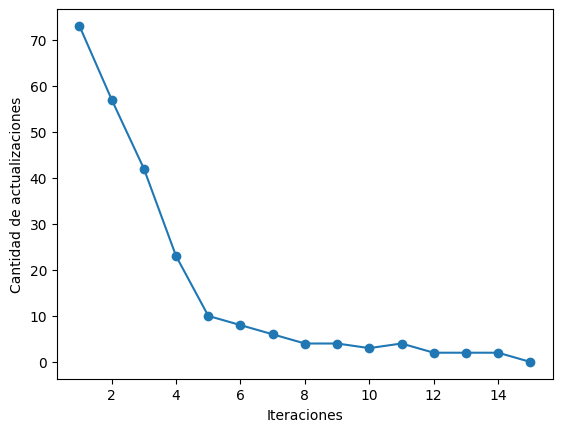

In [ ]:
ppn = Perceptron(alpha=0.005, n_iter=650, random_state=40)
ppn.fit(X_train, T_train)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

###Prueba del Modelo

In [ ]:
Y_test = ppn.predict(X_test)

aciertos = sum(Y_test == T_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_test == T_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))


aciertos =  38
% de aciertos = 95.00 %


In [ ]:
MM = metrics.confusion_matrix(T_test,Y_test)
print("Matriz de confusión:\n%s" % MM)

report = metrics.classification_report(T_test,Y_test)
print("\nResultado de la clasificación:\n%s" % report)

accuracy = metrics.accuracy_score(T_test,Y_test)
print("\nAccuracy: ", 100*accuracy, '%')

print(np.sum(T_train))
print(np.sum(T_test))

Matriz de confusión:
[[20  2]
 [ 0 18]]

Resultado de la clasificación:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       0.90      1.00      0.95        18

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.96      0.95      0.95        40


Accuracy:  95.0 %
73
18


---
###Prueba todas las combinaciones de numerización y normalización, mostrando los datos en una tabla

In [ ]:
# Leer los datos de entrenamiento y de testeo
df_train = pd.read_csv(DATOS_DIR+'Drug_train.csv')
print('Cant.de ejemplos de entrenamiento: ', len(df_train))
df_test = pd.read_csv(DATOS_DIR+'Drug_test.csv')
print('Cant.de ejemplos de testeo: ', len(df_test))

def mapeo_datos(df, codificacion):
    if codificacion == 'numeros':  # Codificación numérica
        mapeo = {'Sex': {'F': 1, 'M': 0},
                 'BP': {'HIGH': 2, 'NORMAL': 1, 'LOW': 0},
                 'Cholesterol': {'NORMAL': 0, 'HIGH': 1}}
        df_map = df.replace(mapeo)
        X = np.array(df_map.iloc[:, :-1])
        T = np.array((df_map['Drug'] == 'drugY') * 1)
        return X, T
    else:  # Codificación dummy (one-hot encoding)
        X = pd.get_dummies(df.drop('Drug', axis=1)) * 1
        T = np.array((df['Drug'] == 'drugY') * 1)
        return X.values, T

# -- configuraciones --
NORMALIZACION = ['no', 'lineal', 'standard']
CODIFICACION = ['numeros', 'dummy']  # Nueva variable para controlar la codificación
ALFA = 0.01
MAX_ITE = 100

# Encabezados de la tabla
print("|  Normalización|  Codificación |  Iteraciones  |    Aciertos   |")
print("|               |               |               |Prueba|Entrena |")

for n in range(len(NORMALIZACION)):
    for c in range(len(CODIFICACION)):
        # replica para normalizar sin afectar datos originales
        (X_train, Y_train) = mapeo_datos(df_train, CODIFICACION[c])
        (X_test, Y_test) = mapeo_datos(df_train, CODIFICACION[c])

        # normalizacón
        if NORMALIZACION[n] == 'no':
            scaler = None
        elif NORMALIZACION[n] == "lineal":
            scaler = preprocessing.MinMaxScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
        else:
            scaler = preprocessing.StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

        # crea perceptrón y entrena
        ppn = Perceptron(alpha=ALFA, n_iter=MAX_ITE)
        ppn.fit(X_train, Y_train)
        iter = len(ppn.errors_)

        # realiza prueba y calcula exactitud
        Y_train_pred = ppn.predict(X_train)
        aciertos_train = metrics.accuracy_score(Y_train, Y_train_pred)
        Y_test_pred = ppn.predict(X_test)
        aciertos_test = metrics.accuracy_score(Y_test, Y_test_pred)

        # Imprime los resultados en forma de tabla
        print("|{:^15}|{:^15}|{:^15}|{:^7.2f}|{:^7.2f}|".format(
            NORMALIZACION[n], CODIFICACION[c], iter, aciertos_test, aciertos_train))



Cant.de ejemplos de entrenamiento:  160
Cant.de ejemplos de testeo:  40
|  Normalización|  Codificación |  Iteraciones  |    Aciertos   |
|               |               |               |Prueba|Entrena |
|      no       |    numeros    |      100      | 0.46  | 0.46  |
|      no       |     dummy     |      100      | 0.46  | 0.46  |
|    lineal     |    numeros    |      13       | 1.00  | 1.00  |
|    lineal     |     dummy     |      42       | 1.00  | 1.00  |
|   standard    |    numeros    |       5       | 1.00  | 1.00  |
|   standard    |     dummy     |       5       | 1.00  | 1.00  |
